In [1]:
import pandas as pd
import csv
import os

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        #ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension:  PlannerPropMax2


Current folders are:
PlannerPropMax2.0
PlannerPropMax2.1
PlannerPropMax2.2
PlannerPropMax2.3


In [2]:
#display all the rows of the dataframe  
pd.set_option('display.max_rows', None)

In [3]:
names=["production in Q", "active labor", "total labor", "active capital in Q","total capital in Q"]

In [4]:
os.chdir("../"+folder+".0")
#key info table database from rank==0
keyInfoTable=pd.read_csv('keyInfoTable.csv', header=None)

#key info table database from rank > 0
for k in range(1,rankNum):   #add the same series from the other folders (if ranknum==1, no execution
    #which folder
    os.chdir("../"+folder+"."+str(k))
    keyInfoTable=keyInfoTable.add(pd.read_csv('keyInfoTable.csv', header=None))
keyInfoTable.columns=names

In [5]:
keyInfoTable

,production in Q,active labor,total labor,active capital in Q,total capital in Q
0,11136.109696,22843.0,105302.0,106473.607341,617656.836027
1,16683.972551,33754.0,105302.0,159601.834732,617656.836027
2,18807.457700,37470.0,105302.0,179737.879576,617656.836027
3,21125.933314,41178.0,105302.0,199670.895605,617656.836027
4,22055.949777,42818.0,105302.0,209819.688187,617656.836027
5,23008.353699,44957.0,109540.0,221776.319962,617656.836027
6,24341.846718,47239.0,113377.0,234192.856141,617290.124573
7,26241.652819,50098.0,117585.0,248095.916344,617285.370693
8,27448.208889,52637.0,121459.0,260785.217324,616805.565523
9,29426.321378,55892.0,125356.0,276625.878616,616669.034406


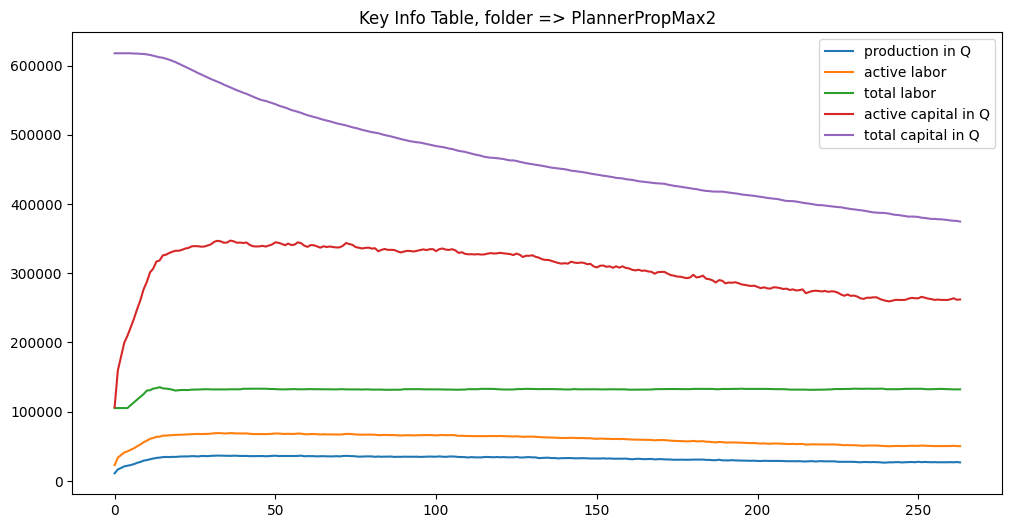

In [6]:
fig=keyInfoTable.plot(figsize=(12,6), title="Key Info Table, folder => " + folder)
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_keyInfoTable.jpg",dpi=180)

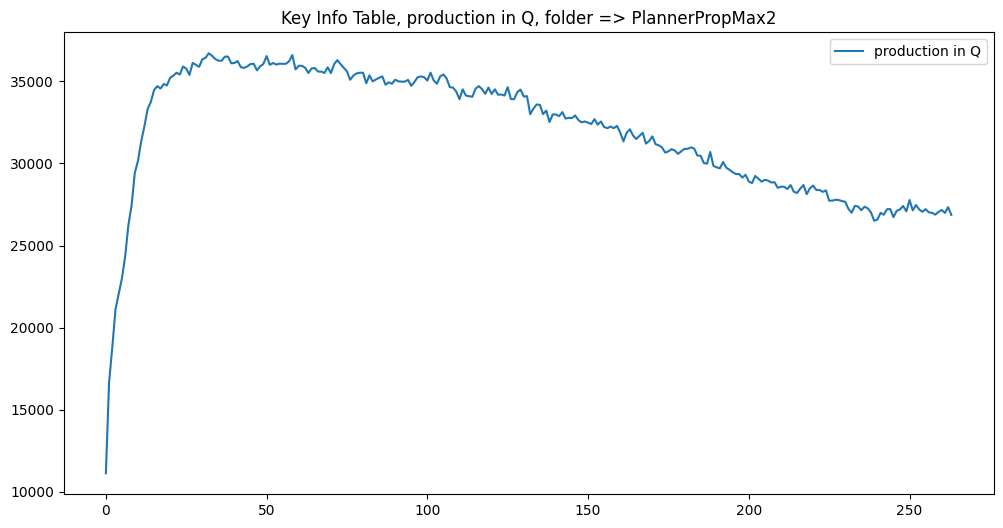

In [7]:
fig=keyInfoTable[["production in Q"]].plot(figsize=(12,6), title="Key Info Table, production in Q, folder => " + folder)
picture=fig.get_figure()
os.chdir("../"+folder+".0")
picture.savefig("_keyInfoTableProductionQ.jpg",dpi=180)